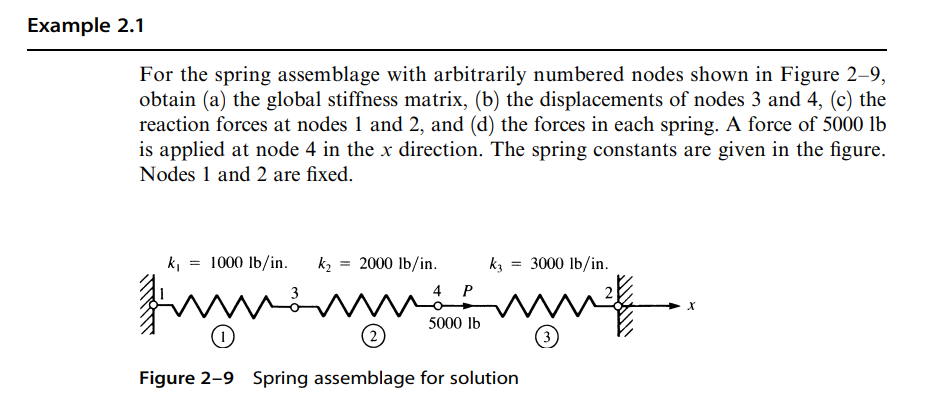

In [1]:
import numpy as np 
import pandas as pd 

Defining elements and nodes

In [2]:
columns = ['start','end','stiffness']
data = [[0,1,1000],[1,2,2000],[2,3,3000]]
elements = pd.DataFrame(data=data,columns=columns)

columns = ['displacement','load']
data = [[0,np.nan],[np.nan,0],[np.nan,5000],[0,np.nan]]
nodes = pd.DataFrame(data=data,columns=columns)

print(elements)
print(nodes)

   start  end  stiffness
0      0    1       1000
1      1    2       2000
2      2    3       3000
   displacement    load
0           0.0     NaN
1           NaN     0.0
2           NaN  5000.0
3           0.0     NaN


Global stiffness matrix

In [3]:
n = np.size(nodes,axis=0) # Returns no.of rows in 'nodes' i.e., no. of nodes
K = np.zeros([n,n])
for i in range(n-1):
    e = elements.loc[i]
    start = e['start']
    end = e['end']
    k = np.zeros([n,n])
    idx = np.ix_([start,end],[start,end])
    k[idx] = e['stiffness']*np.array([[1,-1],[-1,1]])
    K = np.add(K,k)
print(K)

[[ 1000. -1000.     0.     0.]
 [-1000.  3000. -2000.     0.]
 [    0. -2000.  5000. -3000.]
 [    0.     0. -3000.  3000.]]


Solving element equations

In [4]:
A = nodes['displacement'].isna()
print(A)
B = nodes['load'].isna()
KAA = K[np.ix_(A,A)]
print(KAA)
KAB = K[np.ix_(A,B)]
KBA = K[np.ix_(B,A)]
KBB = K[np.ix_(B,B)]


0    False
1     True
2     True
3    False
Name: displacement, dtype: bool
[[ 3000. -2000.]
 [-2000.  5000.]]


In [5]:
U = nodes['displacement']
Uk = U[B]

P = nodes['load']
Pk = P[A]

Uuk = np.dot(np.linalg.inv(KAA),(Pk - np.dot(KAB,Uk)))
Puk = np.dot(KBA,Uuk) + np.dot(KBB,Uk)

In [12]:
results = nodes.copy()
results.loc[A,'displacement'] = Uuk
results.loc[B,'load'] = Puk
print("Nodal forces:")
print(results.load)
print("Nodal displacements:")
print(results.displacement)

Nodal forces:
0    -909.090909
1       0.000000
2    5000.000000
3   -4090.909091
Name: load, dtype: float64
Nodal displacements:
0    0.000000
1    0.909091
2    1.363636
3    0.000000
Name: displacement, dtype: float64
